<a href="https://colab.research.google.com/github/IvanZuhriR/PCD-Assignment/blob/main/PCD_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ivan Zuhri Ramadhani Syahrial

NIM : 24/540342/PA/22939

Kelas: KOM

Mata Kuliah: Pengelolaan Citra Digital

### **Pendahuluan**

Image Enhancement adalah proses dalam pengolahan citra digital yang bertujuan memperbaiki kualitas visual gambar sehingga informasi di dalamnya lebih mudah diekstrak. Berbagai kondisi pada citra seperti blur, terlalu gelap, terlalu terang, atau kontras rendah dapat menurunkan kualitas informasi yang diperoleh.

Dalam tugas ini, beberapa metode digunakan untuk meningkatkan kualitas citra, yaitu:

1. Image Negative (untuk menonjolkan detail terang pada latar gelap).

2. Gamma Correction (untuk memperbaiki citra gelap maupun terang).

3. Histogram Equalization (untuk memperbaiki citra dengan kontras rendah).

4. Laplacian Sharpening (untuk memperbaiki citra blur).

5. Logarithmic Transformation (tuntuk memperbaiki citra gelap)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi bantu untuk menampilkan gambar
def show_images(before, after, title_before="Before", title_after="After"):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(before, cv2.COLOR_BGR2RGB))
    plt.title(title_before)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(after, cv2.COLOR_BGR2RGB))
    plt.title(title_after)
    plt.axis("off")
    plt.show()

### **Image Negative**

Konsep: Transformasi negatif dilakukan dengan persamaan:

s = (L − 1) − r

di mana r adalah intensitas asli, s hasil transformasi, dan L tingkat keabuan maksimum (256 untuk 8-bit).

Tujuan: Membalikkan nilai piksel sehingga detail terang di latar gelap lebih jelas.

Hasil: Gambar tampak seperti negatif film, digunakan untuk analisis detail pada area gelap.

Upload gambar untuk Image Negative:


Saving LowC.webp to LowC.webp


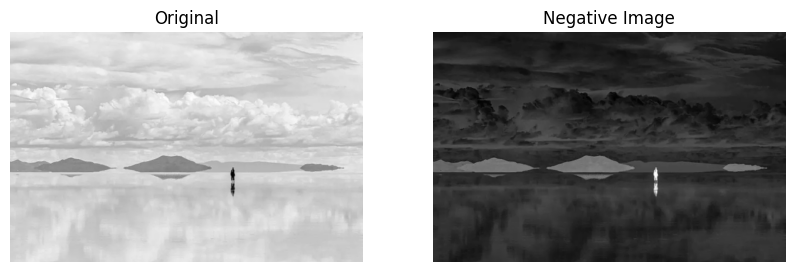

In [ ]:
print("Upload gambar untuk Image Negative:")
uploaded = files.upload()
for fn in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)

negative = 255 - img
show_images(img, negative, "Original", "Negative Image")

### **Gamma Correction (Power-Law Transformation)**

Konsep: Transformasi dilakukan dengan persamaan:

s = c ⋅ r^γ

Jika

γ > 1 → citra menjadi lebih gelap (untuk citra terang).

𝛾 < 1 → citra menjadi lebih terang (untuk citra gelap).

Tujuan: Memperbaiki distribusi intensitas secara non-linear.

Hasil:

Pada citra gelap: detail bayangan terlihat lebih jelas.

Pada citra terang: bagian highlight dikurangi sehingga lebih seimbang.

Upload gambar untuk Gamma Correction:


Saving dark.webp to dark (5).webp


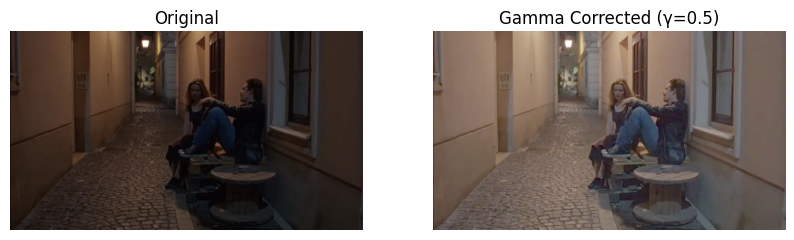

In [ ]:
print("Upload gambar untuk Gamma Correction:")
uploaded = files.upload()
for fn in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)

img_float = img.astype(np.float32) / 255.0

gamma = 0.5

gamma_corrected = np.power(img_float, gamma)

gamma_corrected = np.uint8(gamma_corrected * 255)

show_images(img, gamma_corrected, "Original", f"Gamma Corrected (γ={gamma})")

Upload gambar untuk Gamma Correction:


Saving bright2.webp to bright2 (4).webp


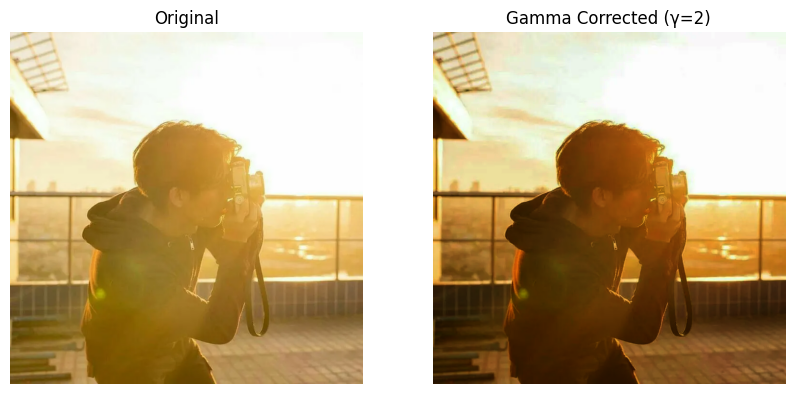

In [ ]:
print("Upload gambar untuk Gamma Correction:")
uploaded = files.upload()
for fn in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)

img_float = img.astype(np.float32) / 255.0

gamma = 2

gamma_corrected = np.power(img_float, gamma)

gamma_corrected = np.uint8(gamma_corrected * 255)

show_images(img, gamma_corrected, "Original", f"Gamma Corrected (γ={gamma})")

### **Histogram Equalization**

Konsep: Metode ini menyebarkan distribusi intensitas piksel agar mencakup seluruh rentang (0–255).

Tujuan: Meningkatkan kontras global citra.

Hasil: Gambar dengan kontras rendah (kusam) menjadi lebih jelas dan detail lebih terlihat.

Upload gambar untuk Histogram Equalization:


Saving LowC.webp to LowC (1).webp


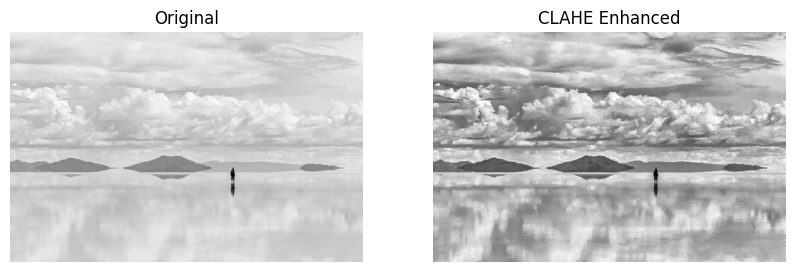

In [ ]:
print("Upload gambar untuk Histogram Equalization:")
uploaded = files.upload()
for fn in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)

# Konversi ke LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)

limg = cv2.merge((cl, a, b))
enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

show_images(img, enhanced, "Original", "CLAHE Enhanced")

### **Laplacian Sharpening**

Konsep: Menggunakan operator Laplacian (filter high-pass) untuk menonjolkan tepi citra

Tujuan: Memperbaiki citra blur dengan meningkatkan detail tepi.

Hasil: Gambar yang blur menjadi lebih tajam dan detail garis lebih jelas.

Upload gambar untuk Sharpening:


Saving 1.webp to 1.webp


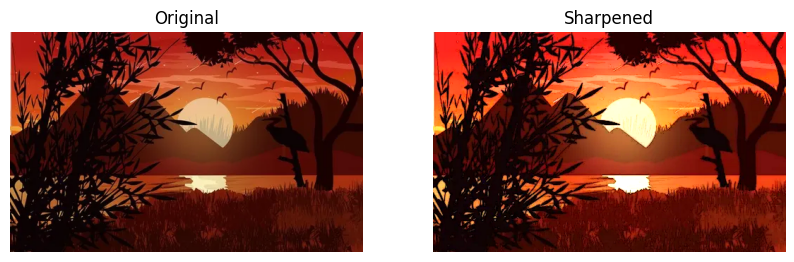

In [ ]:
print("Upload gambar untuk Sharpening:")
uploaded = files.upload()
for fn in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
sharpened = cv2.addWeighted(img, 1.5, laplacian, -0.5, 0)

show_images(img, sharpened, "Original", "Sharpened")

### **Logarithmic Transformation**

Konsep:
Transformasi logaritmik digunakan untuk memperluas rentang nilai piksel pada area gelap citra sehingga detail di area tersebut lebih terlihat.
Persamaan umum:

s = c ⋅ log(1+r)

di mana:

r = nilai intensitas input (0–255)

s = nilai intensitas output

c = konstanta penskalaan, agar output tetap berada di 0–255

Tujuan:

1. Menonjolkan detail pada citra gelap.

2. Cocok untuk citra dengan rentang nilai rendah di area shadow.

Hasil:

Citra gelap menjadi lebih cerah pada bagian shadow tanpa merusak bagian terang.

Upload gambar untuk Logarithmic Transform:


Saving dark.webp to dark (3).webp


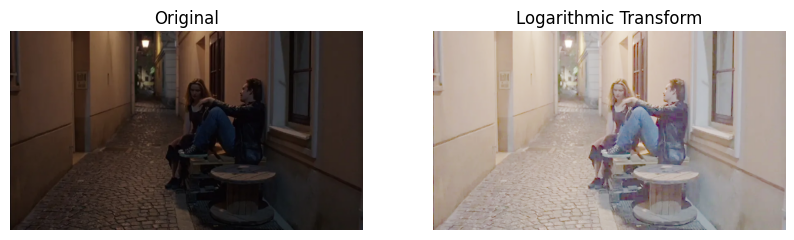

In [ ]:
print("Upload gambar untuk Logarithmic Transform:")
uploaded = files.upload()
for fn in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)

img_float = img.astype(np.float32)

c = 255 / np.log(1 + np.max(img_float))
log_transformed = c * np.log(1 + img_float)

log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)
log_transformed = np.array(log_transformed, dtype=np.uint8)

show_images(img, log_transformed, "Original", "Logarithmic Transform")